In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.io
import os
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle

#os.chdir('./cartilage-x/edema/')
print (os.getcwd())

E:\Users\Leo\Desktop\datax\cartilage-x\edema


In [6]:
# Loads the pickle files
pickled_mris = [f for f in os.listdir('dat')]
mris = {}
for filename in pickled_mris:
    with open('dat/' + filename, 'rb') as f:
        mri = pickle.load(f)[0]
        mris[filename] = mri

In [14]:
# Gets the filenames in each directory

mris = [f for f in os.listdir('../../mri/') ]

segs = [f for f in os.listdir('../../seg/') ][1:]

In [15]:
# Loads the files .mat files
mri={}
seg={}

for i in range(len(mris)):
    mri[mris[i]] = scipy.io.loadmat('../../mri/' + mris[i])['im_store']
    seg[segs[i]] = scipy.io.loadmat('../../seg/' + segs[i])['pred_con_vol']

In [16]:
def get_indicies(matrix):
    z_len = np.shape(matrix)[2]
    indicies = []
    for i in range(z_len):
        slice = matrix[:,:,max(0, i - 1):i]
        slice = np.sum(slice)
        if slice != 0:
#             print('z index = {0}     slice sum = {1}'.format(i, slice))
            indicies.append(i)
    return (min(indicies), max(indicies))

In [31]:
def get_crop_size(matrix):
    x = np.shape(matrix)[1]
    y = np.shape(matrix)[0]
    length_before_edge = 0
    edges = []
    
    for i in range(x):
        for j in range(y):
            if matrix[i][j] != 0:
#                 edges.append((i, j, length_before_edge))
                edges.append(length_before_edge)
                length_before_edge = 0
                break
            length_before_edge += 1
        length_before_edge = 0
#         edges.append((i, i, length_before_edge))
    return max(edges), min(edges)

In [109]:
def save_1d_matrix(name, matrix, z_min, z_max, func=np.mean):
    data_dir = 'dat/'
    matrix = matrix[:,:,:z_min:z_max]
    matrix = [func(matrix, axis=2)]
    with open(data_dir + name, 'wb+') as f:
        pickle.dump(matrix, f, pickle.HIGHEST_PROTOCOL)

In [69]:
get_indicies(seg['AFACL2005_01.mat'])

(15, 95)

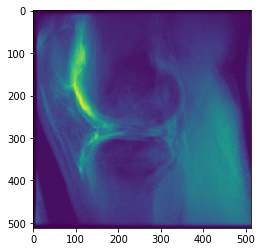

In [70]:
img = np.mean(mri['AFACL2005_01.mat'][:,:,15:95], axis=2)
plt.imshow(img)
plt.show()

In [36]:
get_crop_size(np.mean(seg['AFACL2005_01.mat'], axis=2))

(324, 80)

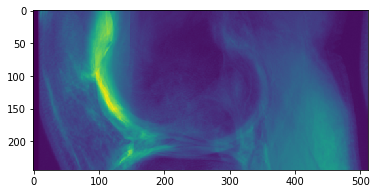

In [37]:
plt.imshow(img[80:324])
plt.show()

In [73]:
save_1d_matrix('AFACL2005_01', mri['AFACL2005_01.mat'], 15, 95)

In [110]:
for segmentation in segs:
    filename = segmentation.strip('.mat')
    z_min, z_max = get_indicies(seg[segmentation])
    save_1d_matrix(filename, mri[segmentation], z_min, z_max)

In [111]:
with open('dat/AFACL2005_01', 'rb') as f:
    x = pickle.load(f)

In [12]:
for key in mris:
    mris[key] = mris[key].ravel()

In [29]:
df = pd.DataFrame(mris).T
#df['Y']=[3,3,2,3,1,3,3,1,3,0,2,0,3,0,0,1,2,3,0,0,2,0,3,3]
df['Y']=[1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,1,1,0,0,1,0,1,1]

,0,1,2,3,4,5,6,7,8,9,...,262135,262136,262137,262138,262139,262140,262141,262142,262143,Y
AFACL2005_01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
AFACL2006_01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001852,0.001544,0.002161,0.002779,0.003087,0.003705,0.003087,0.003705,0.002779,1
AFACL2007_01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
AFACL2008_01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005464,0.004250,0.003643,0.003036,0.003643,0.003643,0.004250,0.004857,0.004857,1
AFACL2009_01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
AFACL2011_01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
AFACL2012_01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001844,0.004425,0.004794,0.003687,0.003319,0.003319,0.001475,0.001844,0.002581,1
AFACL2013_01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007190,0.006591,0.004194,0.002397,0.004194,0.005992,0.005992,0.005392,0.005992,1
AFACL2014_01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
AFACL2015_01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [31]:
from sklearn.model_selection import train_test_split
X=df.iloc[:,:-1]
Y=df['Y']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=100)
print ('Number of samples in training data:',len(x_train))
print ('Number of samples in validation data:',len(x_test))

Number of samples in training data: 20
Number of samples in validation data: 4


In [43]:
from sklearn.svm import SVC

#Name our regression object
edema_svm = SVC()

print ('Training a svm model..')
edema_svm.fit(x_train, y_train)

#Training Accuracy
training_accuracy=edema_svm.score(x_train,y_train)
print ('Training Accuracy:',training_accuracy)


validation_accuracy=edema_svm.score(x_test,y_test)
print('Accuracy of the model on unseen validation data: ',validation_accuracy)

Training a svm model..
Training Accuracy: 0.8
Accuracy of the model on unseen validation data:  0.25
